In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('./JavaTop2000.csv')

query = """
SELECT ID, TagName
INTO #MyTags
FROM Tags
WHERE 
  TagName IN ('java')
  
SELECT TOP 2000
  Posts.ID AS [Post Link],
  Posts.Tags AS [Tags],
  Posts.Score AS [Score]
FROM Posts
  join PostTags ON PostTags.PostID = Posts.ID
  join Tags ON Tags.ID = PostTags.TagID
WHERE TagID in (SELECT ID FROM #MyTags)
ORDER BY Posts.Score DESC
"""

In [6]:
data.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,ClosedDate,CommunityOwnedDate,ContentLicense,PostId,TagId,Id.1,TagName,Count,ExcerptPostId,WikiPostId
0,11227809,1,11227902.0,NaN,2012-06-27 13:51:36,NaN,24856,1528592,<p>Here is a piece of C++ code that shows some...,87234.0,...,NaN,NaN,CC BY-SA 4.0,11227809,17,17,java,1715860,3624966,3607018
1,6841333,1,6841479.0,NaN,2011-07-27 08:15:58,NaN,6935,667557,"<p>If I run the following program, which parse...",342235.0,...,NaN,NaN,CC BY-SA 4.0,6841333,17,17,java,1715860,3624966,3607018
2,40480,1,NaN,NaN,2008-09-02 20:14:29,NaN,6724,2024594,<p>I always thought Java uses <strong>pass-by-...,4315.0,...,NaN,2012-09-14 18:22:55,CC BY-SA 4.0,40480,17,17,java,1715860,3624966,3607018
3,309424,1,309448.0,NaN,2008-11-21 16:47:40,NaN,4156,2158738,<p>If you have a <code>java.io.InputStream</co...,16616.0,...,NaN,NaN,CC BY-SA 4.0,309424,17,17,java,1715860,3624966,3607018
4,271526,1,271874.0,NaN,2008-11-07 08:31:40,NaN,4081,1267072,<p>I use <code>object != null</code> a lot to ...,34856.0,...,NaN,2011-10-21 09:02:37,CC BY-SA 4.0,271526,17,17,java,1715860,3624966,3607018


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     2000 non-null   int64  
 1   PostTypeId             2000 non-null   int64  
 2   AcceptedAnswerId       1768 non-null   float64
 3   ParentId               0 non-null      float64
 4   CreationDate           2000 non-null   object 
 5   DeletionDate           0 non-null      float64
 6   Score                  2000 non-null   int64  
 7   ViewCount              2000 non-null   int64  
 8   Body                   2000 non-null   object 
 9   OwnerUserId            1944 non-null   float64
 10  OwnerDisplayName       342 non-null    object 
 11  LastEditorUserId       1845 non-null   float64
 12  LastEditorDisplayName  230 non-null    object 
 13  LastEditDate           1870 non-null   object 
 14  LastActivityDate       2000 non-null   object 
 15  Titl

In [19]:
data.describe()

,Id,PostTypeId,AcceptedAnswerId,ParentId,DeletionDate,Score,ViewCount,OwnerUserId,LastEditorUserId,AnswerCount,CommentCount,FavoriteCount,PostId,TagId,Id.1,Count,ExcerptPostId,WikiPostId
count,2.000000e+03,2000.0,1.768000e+03,0.0,0.0,2000.00000,2.000000e+03,1.944000e+03,1.845000e+03,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.0,2000.0,2000.0,2000.0,2000.0
mean,7.884909e+06,1.0,8.604406e+06,NaN,NaN,386.23100,3.601840e+05,6.437605e+05,1.896544e+06,13.827000,3.294000,120.864000,7.884909e+06,17.0,17.0,1715860.0,3624966.0,3607018.0
std,9.739053e+06,0.0,1.030187e+07,NaN,NaN,709.91486,4.126992e+05,1.051921e+06,2.364754e+06,9.576321,4.190745,304.060314,9.739053e+06,0.0,0.0,0.0,0.0,0.0
min,5.640000e+02,1.0,5.660000e+02,NaN,NaN,155.00000,3.013000e+03,2.500000e+01,-1.000000e+00,0.000000,0.000000,1.000000,5.640000e+02,17.0,17.0,1715860.0,3624966.0,3607018.0
25%,1.299371e+06,1.0,1.458387e+06,NaN,NaN,187.75000,1.450020e+05,6.099800e+04,2.319820e+05,7.000000,1.000000,43.000000,1.299371e+06,17.0,17.0,1715860.0,3624966.0,3607018.0
50%,4.064244e+06,1.0,4.483780e+06,NaN,NaN,246.00000,2.458425e+05,2.646055e+05,1.000551e+06,11.000000,2.000000,70.000000,4.064244e+06,17.0,17.0,1715860.0,3624966.0,3607018.0
75%,1.053122e+07,1.0,1.188532e+07,NaN,NaN,378.00000,4.259080e+05,7.820235e+05,2.631715e+06,18.000000,4.000000,122.250000,1.053122e+07,17.0,17.0,1715860.0,3624966.0,3607018.0
max,5.976353e+07,1.0,5.976467e+07,NaN,NaN,24856.00000,6.062401e+06,1.060199e+07,1.391213e+07,100.000000,37.000000,11113.000000,5.976353e+07,17.0,17.0,1715860.0,3624966.0,3607018.0


<AxesSubplot:ylabel='Frequency'>

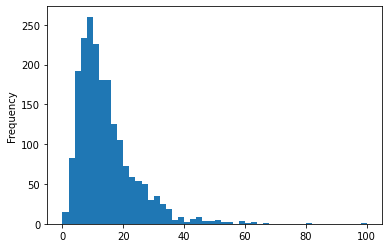

In [10]:
data.AnswerCount.plot(kind='hist',bins=50)

<AxesSubplot:ylabel='Frequency'>

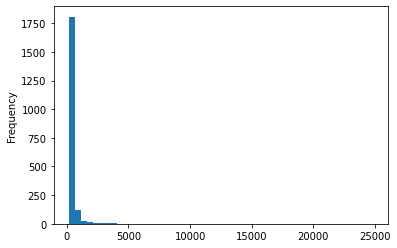

In [11]:
data.Score.plot(kind='hist',bins=50)

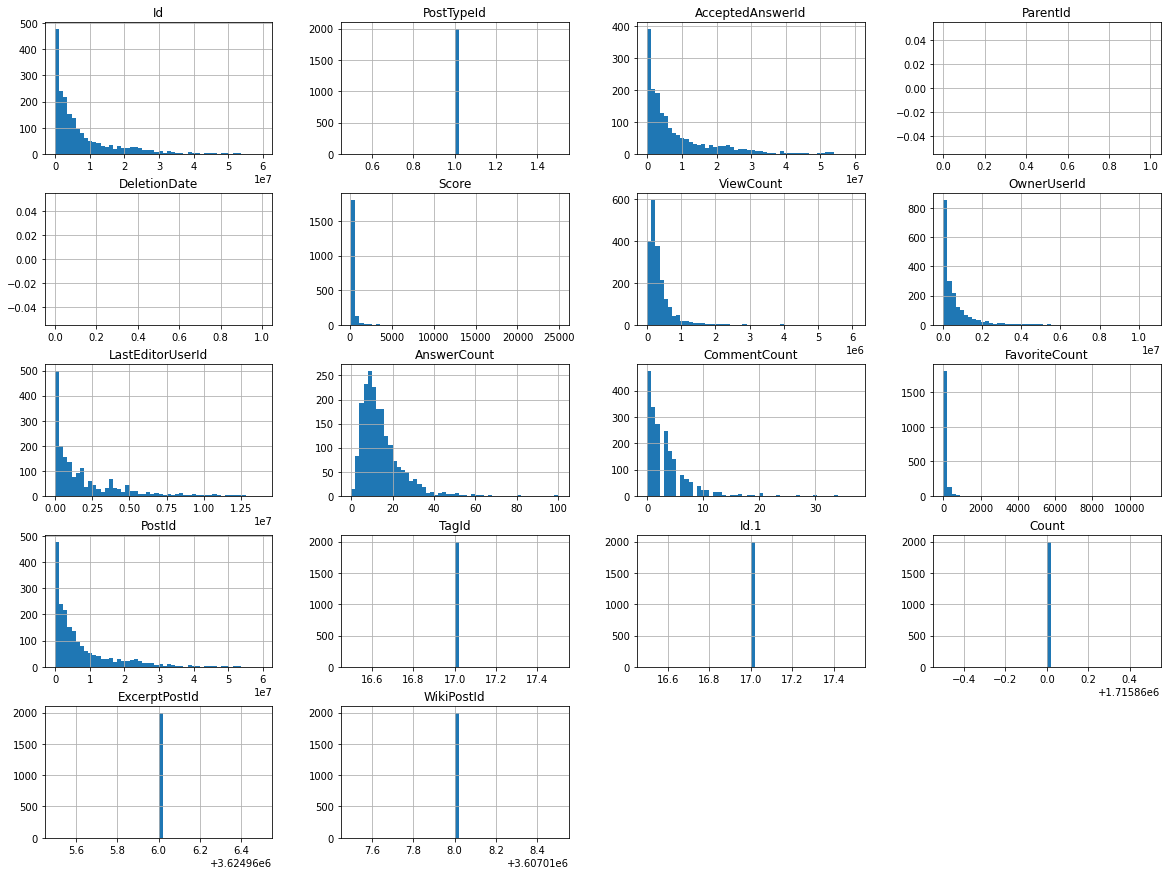

In [22]:
data.hist(bins=50, figsize=(20,15))

In [18]:
data.ContentLicense.value_counts()

CC BY-SA 3.0    1244
CC BY-SA 4.0     479
CC BY-SA 2.5     277
Name: ContentLicense, dtype: int64

<AxesSubplot:>

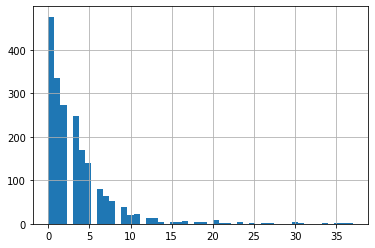

In [21]:
data.CommentCount.hist(bins=50)

array([[<AxesSubplot:xlabel='AnswerCount', ylabel='AnswerCount'>,
        <AxesSubplot:xlabel='ViewCount', ylabel='AnswerCount'>,
        <AxesSubplot:xlabel='CommentCount', ylabel='AnswerCount'>],
       [<AxesSubplot:xlabel='AnswerCount', ylabel='ViewCount'>,
        <AxesSubplot:xlabel='ViewCount', ylabel='ViewCount'>,
        <AxesSubplot:xlabel='CommentCount', ylabel='ViewCount'>],
       [<AxesSubplot:xlabel='AnswerCount', ylabel='CommentCount'>,
        <AxesSubplot:xlabel='ViewCount', ylabel='CommentCount'>,
        <AxesSubplot:xlabel='CommentCount', ylabel='CommentCount'>]],
      dtype=object)

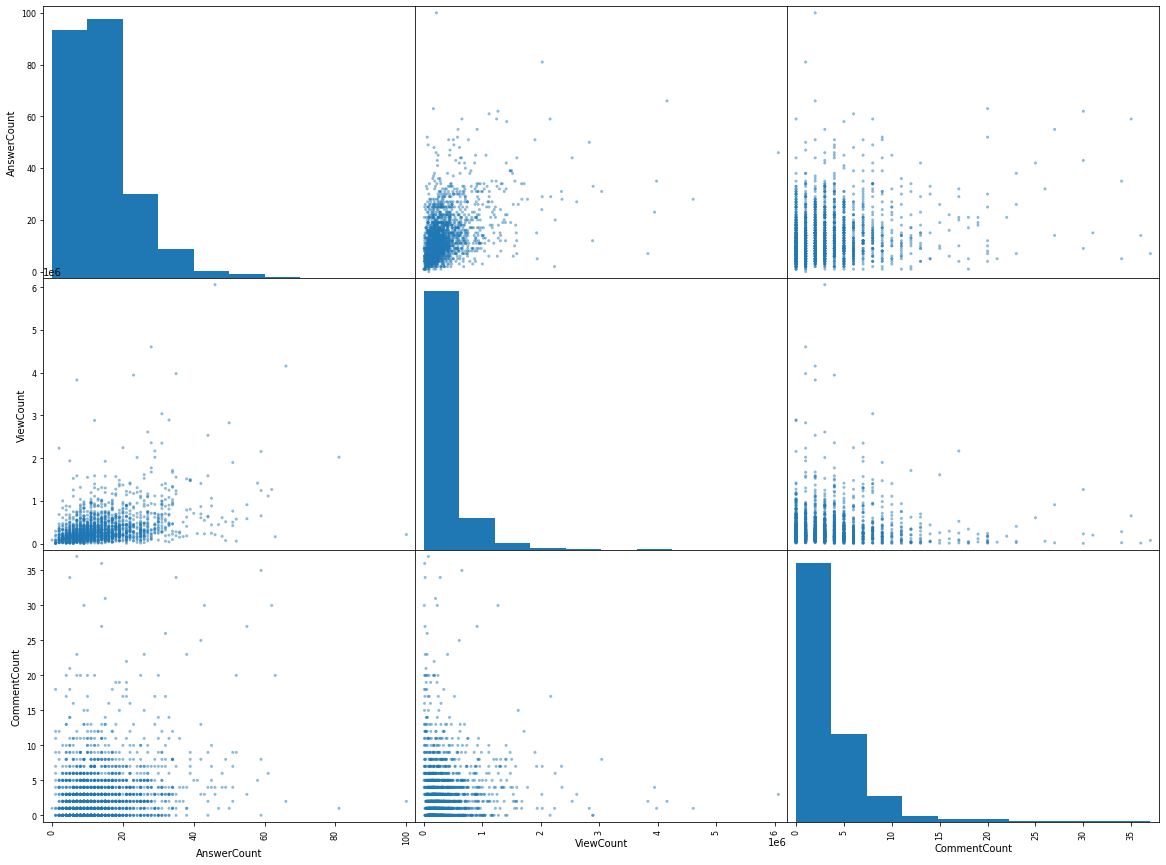

In [24]:
from pandas.plotting import scatter_matrix

attributes =["AnswerCount","ViewCount","CommentCount"]
scatter_matrix(data[attributes],figsize=(20,15))

In [25]:
data.corr()

,Id,PostTypeId,AcceptedAnswerId,ParentId,DeletionDate,Score,ViewCount,OwnerUserId,LastEditorUserId,AnswerCount,CommentCount,FavoriteCount,PostId,TagId,Id.1,Count,ExcerptPostId,WikiPostId
Id,1.000000,NaN,0.930105,NaN,NaN,-0.059411,-0.143156,0.760236,0.096496,-0.155568,0.189890,-0.069858,1.000000,NaN,NaN,NaN,NaN,NaN
PostTypeId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AcceptedAnswerId,0.930105,NaN,1.000000,NaN,NaN,-0.052462,-0.122012,0.699261,0.112068,-0.109242,0.185005,-0.067518,0.930105,NaN,NaN,NaN,NaN,NaN
ParentId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeletionDate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Score,-0.059411,NaN,-0.052462,NaN,NaN,1.000000,0.393021,-0.061495,0.084378,0.294098,0.101034,0.912708,-0.059411,NaN,NaN,NaN,NaN,NaN
ViewCount,-0.143156,NaN,-0.122012,NaN,NaN,0.393021,1.000000,-0.086431,0.074375,0.415985,0.000322,0.284054,-0.143156,NaN,NaN,NaN,NaN,NaN
OwnerUserId,0.760236,NaN,0.699261,NaN,NaN,-0.061495,-0.086431,1.000000,0.128595,-0.092825,0.193752,-0.064958,0.760236,NaN,NaN,NaN,NaN,NaN
LastEditorUserId,0.096496,NaN,0.112068,NaN,NaN,0.084378,0.074375,0.128595,1.000000,0.067510,0.015852,0.045100,0.096496,NaN,NaN,NaN,NaN,NaN
AnswerCount,-0.155568,NaN,-0.109242,NaN,NaN,0.294098,0.415985,-0.092825,0.067510,1.000000,0.212128,0.253815,-0.155568,NaN,NaN,NaN,NaN,NaN
